# Alzheimer’s Risk Prediction Final Project 

In [1]:
import pandas as pd  
import numpy as np

#Loading the dataset 
alzheimers_df = pd.read_csv("alzheimers_disease_data_2.csv")

## Preprocessing Testing Data 

In [2]:
alzheimers_df.shape

(2149, 35)

In [3]:
alzheimers_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:

alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

No missing values\!\! Yay\!\!

In [5]:
alzheimers_df = alzheimers_df.drop(columns=['DoctorInCharge', 'PatientID'])
alzheimers_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


Dropped the column "DoctorInCharge" as it only contained values with the format "XXXConfid"\.

Drpped the column 'PatientID' since its an identifier and has no predictive value 

In [6]:

alzheimers_df.shape

(2149, 33)

In [7]:
## missing values 
alzheimers_df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [8]:
## check datatypes
alzheimers_df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [188]:
#feature and target 
X = alzheimers_df.drop(columns='Diagnosis')
y = alzheimers_df['Diagnosis']

## EDA \(Data Pre Processing\)

In [64]:
#Rania imports 
import matplotlib.pyplot as plt
import seaborn as sns 
mpl.rc_file_defaults()

In [67]:
#Rania
alzheimers_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [73]:
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [82]:
#Rania
alzheimers_df.isnull().sum()
alzheimers_df.duplicated().sum()

0

In [88]:
#Rania summarizing 
alzheimers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


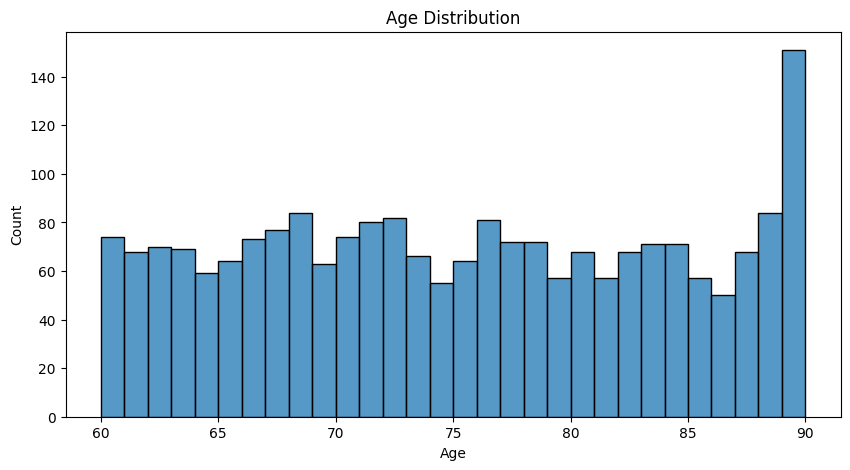

In [91]:
#Rania plot 1 for age dist
plt.figure(figsize=(10,5))
sns.histplot(alzheimers_df['Age'], bins = 30)
plt.title('Age Distribution')
plt.show()

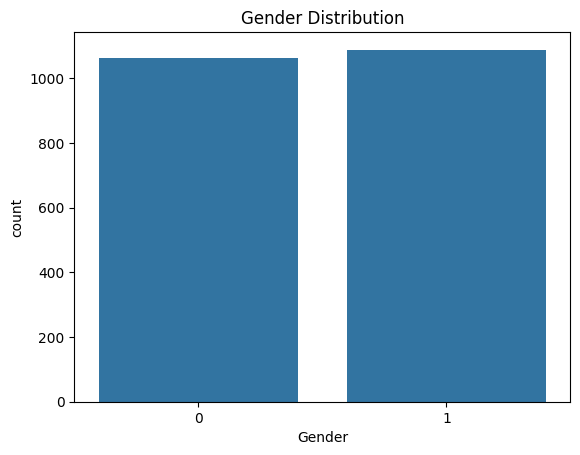

In [94]:
#Rania plot 2 for gender dist
sns.countplot(x = 'Gender', data = alzheimers_df)
plt.title('Gender Distribution')
plt.show()

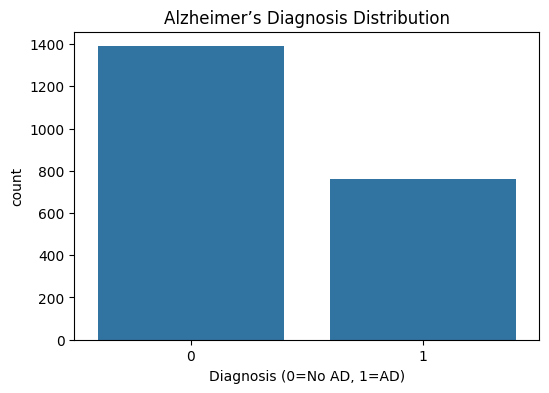

In [97]:
#Anoushka plot to check for whether dataset is skewed towards diganoses- it seems like it is
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=alzheimers_df)
plt.title('Alzheimer’s Diagnosis Distribution')
plt.xlabel('Diagnosis (0=No AD, 1=AD)')
plt.show()

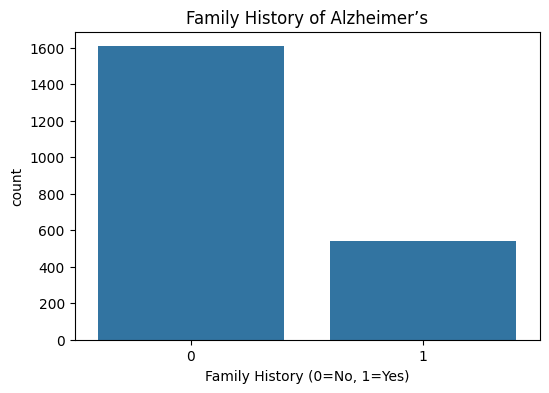

In [100]:
#Anoushka plot for family history
plt.figure(figsize=(6,4))
sns.countplot(x='FamilyHistoryAlzheimers', data=alzheimers_df)
plt.title('Family History of Alzheimer’s')
plt.xlabel('Family History (0=No, 1=Yes)')
plt.show()

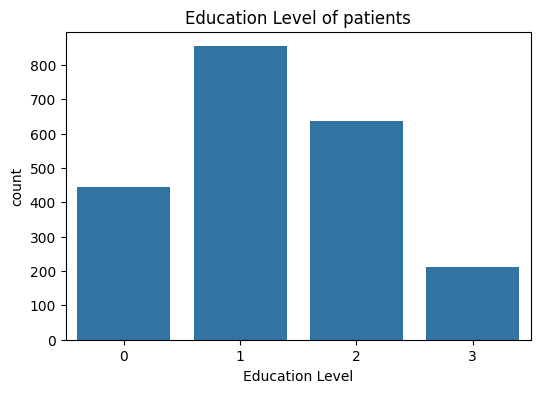

In [103]:
plt.figure(figsize=(6,4))
sns.countplot(x='EducationLevel', data=alzheimers_df)
plt.title('Education Level of patients')
plt.xlabel('Education Level')
plt.show()

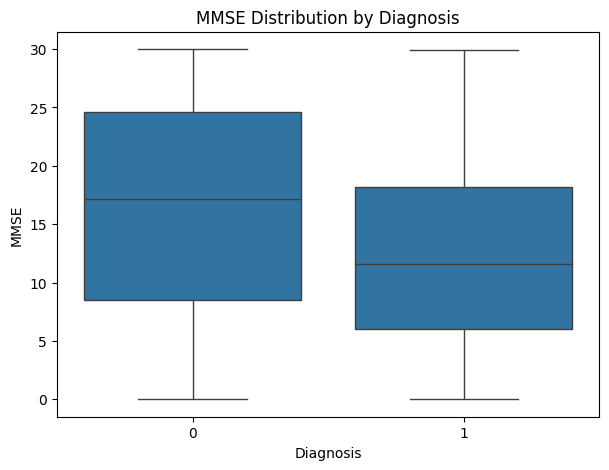

In [109]:
#Anoushka Comparing MMSE(s)
plt.figure(figsize=(7,5))
sns.boxplot(x='Diagnosis', y='MMSE', data=alzheimers_df)
plt.title('MMSE Distribution by Diagnosis')
plt.show()

MMSE is the Mini-mental state examination score so it makes sense that it is lower in patients with ALzheimer's diagnosis, so something to keep a track of in modeling.

Text(0.5, 1.0, 'Age vs MMSE (with Regression Line)')

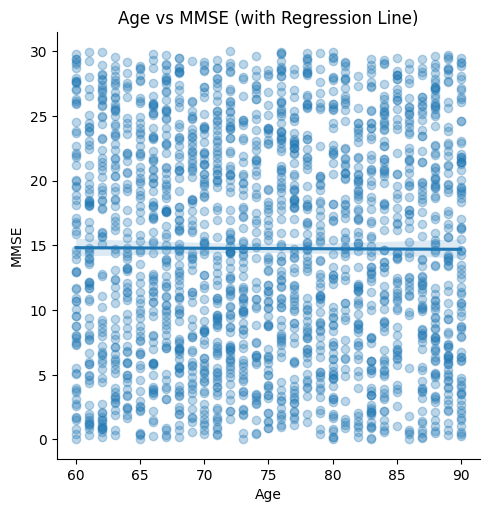

In [125]:
#Anoushka bivariate plots: understanding relationships between variables
import numpy as np

alzheimers_df["MMSE_jitter"] = alzheimers_df["MMSE"] + np.random.normal(0, 0.3, len(alzheimers_df))
sns.lmplot(
    x="Age", 
    y="MMSE", 
    data=alzheimers_df,
    scatter_kws={'alpha':0.3}
)
plt.title("Age vs MMSE (with Regression Line)")

In [128]:
alzheimers_df["Age"].corr(alzheimers_df["MMSE"])

-0.004234771200121294

It looks like MMSE and age are not correlated at all, the graphs above give us evidence\. So let us see MMSE versus other categorical variables:

<AxesSubplot: xlabel='CholesterolTotal', ylabel='MMSE'>

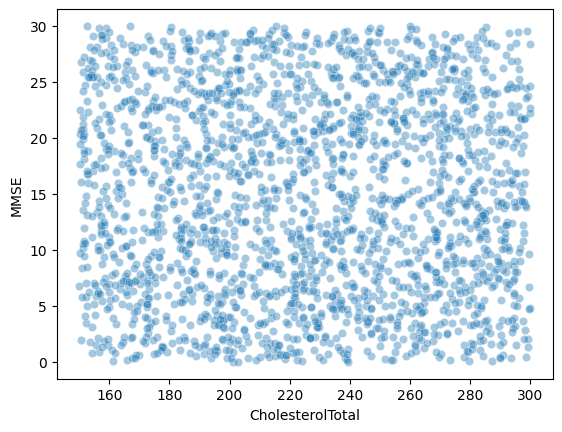

In [131]:
sns.scatterplot(x="CholesterolTotal", y="MMSE", data=alzheimers_df, alpha=0.4)

<AxesSubplot: xlabel='SystolicBP', ylabel='MMSE'>

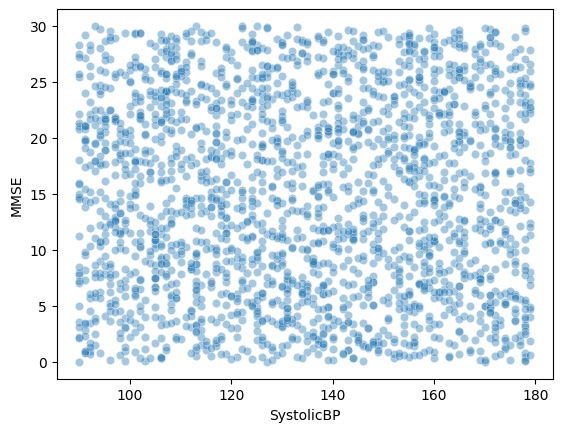

In [134]:
sns.scatterplot(x="SystolicBP", y="MMSE", data=alzheimers_df, alpha=0.4)

<AxesSubplot: xlabel='BMI', ylabel='MMSE'>

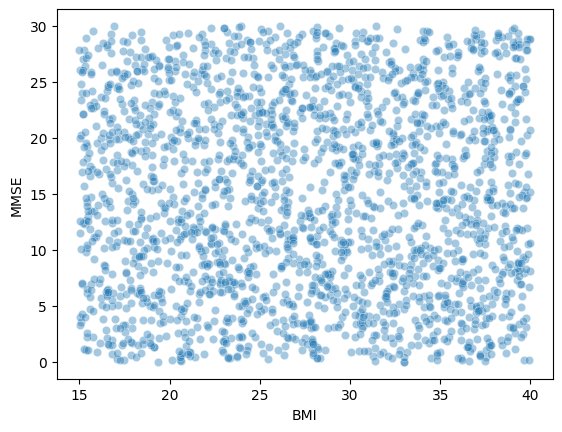

In [137]:
sns.scatterplot(x="BMI", y="MMSE", data=alzheimers_df, alpha=0.4)

In [140]:
alzheimers_df[['MMSE','MemoryComplaints','Disorientation','Confusion','Forgetfulness']].corr()

,MMSE,MemoryComplaints,Disorientation,Confusion,Forgetfulness
MMSE,1.000000,0.007652,0.036715,0.003763,0.011848
MemoryComplaints,0.007652,1.000000,0.013442,-0.007749,-0.006961
Disorientation,0.036715,0.013442,1.000000,0.007034,-0.032013
Confusion,0.003763,-0.007749,0.007034,1.000000,0.010100
Forgetfulness,0.011848,-0.006961,-0.032013,0.010100,1.000000


<AxesSubplot: xlabel='Diagnosis', ylabel='BMI'>

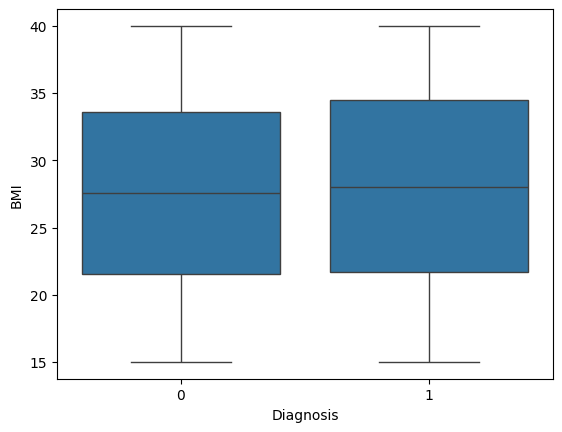

In [143]:
sns.boxplot(x="Diagnosis", y="BMI", data=alzheimers_df)

Text(0.5, 0, 'Smoking (0=Non-smoker, 1=Smoker)')

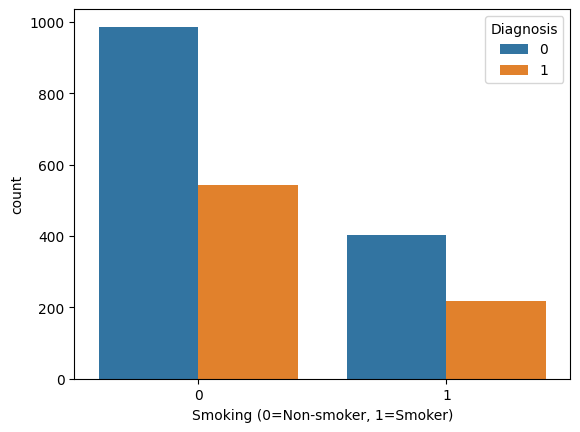

In [146]:
sns.countplot(x="Smoking", hue="Diagnosis", data=alzheimers_df)
plt.xlabel("Smoking (0=Non-smoker, 1=Smoker)")

Okay so we see some trend over here with smoking\- people who do not smoke seem to have been diagnosed more than people who do smoke which seems counterintuitive but there might be something here\.

In [1]:
sns.boxplot(x="Diagnosis", y="MMSE", data=alzheimers_df)

NameError: name 'sns' is not defined

The plot above shows us lower FunctionalAssessment score (which seems to be from 0-10) for those diagnosed with Alzheimer's.

In [152]:
alzheimers_df["FunctionalAssessment"].describe()

count    2149.000000
mean        5.080055
std         2.892743
min         0.000460
25%         2.566281
50%         5.094439
75%         7.546981
max         9.996467
Name: FunctionalAssessment, dtype: float64

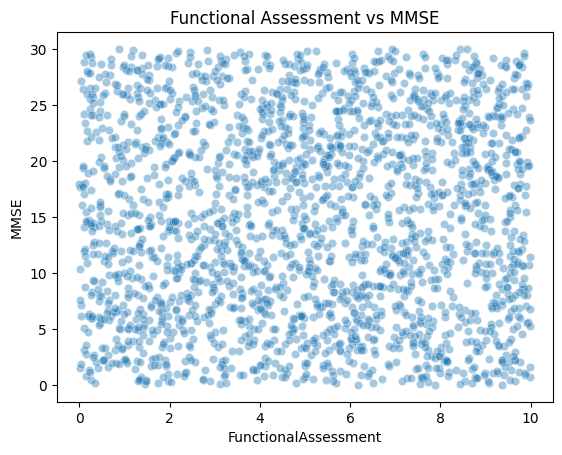

In [155]:
sns.scatterplot(x="FunctionalAssessment", y="MMSE", data=alzheimers_df, alpha=0.4)
plt.title("Functional Assessment vs MMSE")
plt.show()

In [158]:
alzheimers_df["FunctionalAssessment"].corr(alzheimers_df["MMSE"])

0.024932154455976123

<AxesSubplot: >

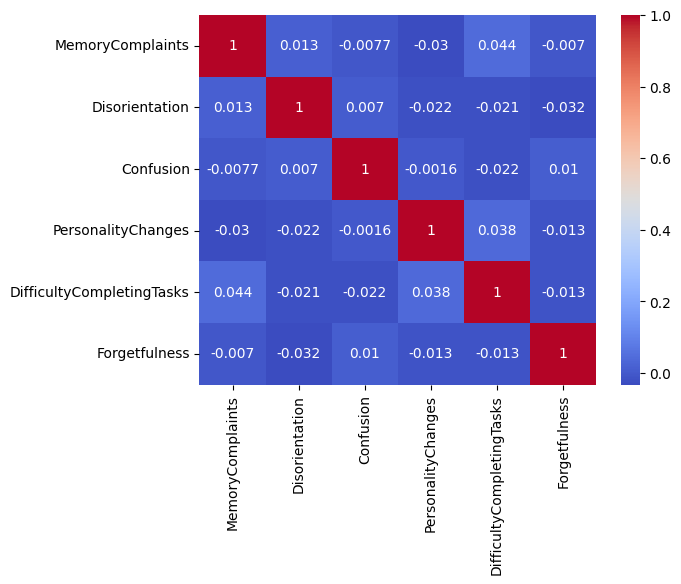

In [161]:
#Anoushka Heatmap of symptoms vs themselves
symptom_cols = [
    "MemoryComplaints", "Disorientation", "Confusion",
    "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness"
]

sns.heatmap(alzheimers_df[symptom_cols].corr(), annot=True, cmap="coolwarm")


<AxesSubplot: xlabel='MemoryComplaints', ylabel='MMSE'>

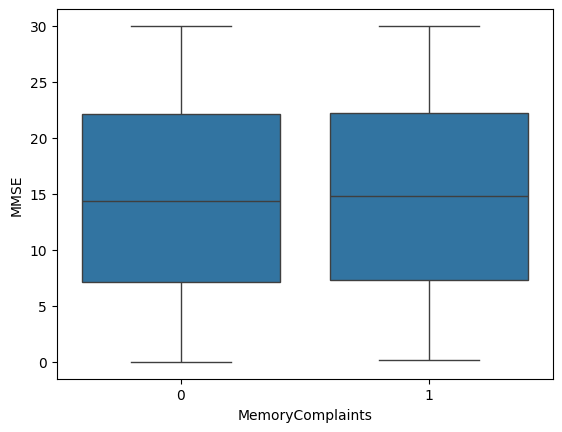

In [164]:
sns.boxplot(x="MemoryComplaints", y="MMSE", data=alzheimers_df)

<AxesSubplot: xlabel='Diagnosis', ylabel='ADL'>

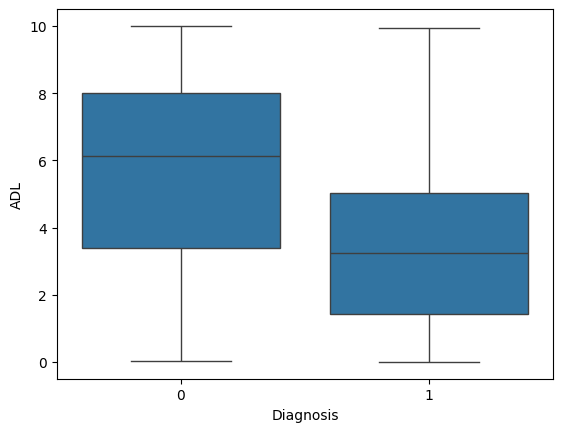

In [167]:
sns.boxplot(y="ADL", x="Diagnosis", data=alzheimers_df)

This plot is interesting because out of all the scores that measure quality of living, ADL (activities of Daily Living) show a marked difference between diagnosed and undiagnosed individuals i.e., diagnosed individuals have a lower ADL score.

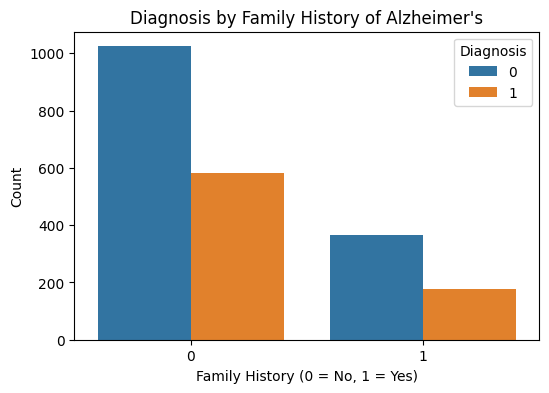

In [114]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="FamilyHistoryAlzheimers",
    hue="Diagnosis",
    data=alzheimers_df
)
plt.title("Diagnosis by Family History of Alzheimer's")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [117]:
pd.crosstab(alzheimers_df["FamilyHistoryAlzheimers"], alzheimers_df["Diagnosis"])

Diagnosis,0,1
FamilyHistoryAlzheimers,,
0,1024,583
1,365,177


## Summary so far:

The dataset contains 2,149 observations and 34 variables describing demographic, clinical, cognitive, and behavioral features related to Alzheimer’s disease\. Diagnosis is a binary outcome indicating whether a participant has Alzheimer’s\.

- Although cognitive scores typically decline with age in real clinical populations, this dataset appears to include only older adults \(ages 60\+\), making it harder to observe age\-related variation\. 

- The scatterplot of FunctionalAssessment, SystolicBP, Age, BMI, CholesterolTotal vs MMSE also exhibits a dense, uniform cloud of points with no discernible structure or slope\. This is good in that the points do not have a high chance of exhibiting bias, however, it also means it is harder to discern a trend\- which is what we're trying to figure out with this project\.

- It would be interesting to look at all the different cognitive scores and try to see if that helps predict the Alzheimer's diagnoses because the other categorical variables don't seem as consistent\.

<AxesSubplot: >

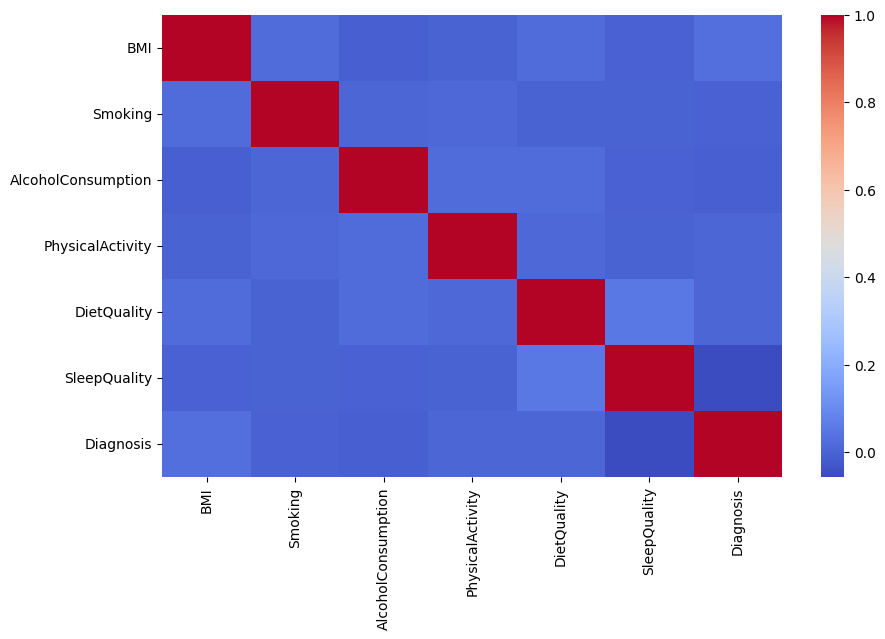

In [182]:
## Martha: Correlation Heatmap with only modifiable variables 
modifiable_feat = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Diagnosis']

plt.figure(figsize=(10,6))
sns.heatmap(alzheimers_df[modifiable_feat].corr(), cmap='coolwarm')

<AxesSubplot: >

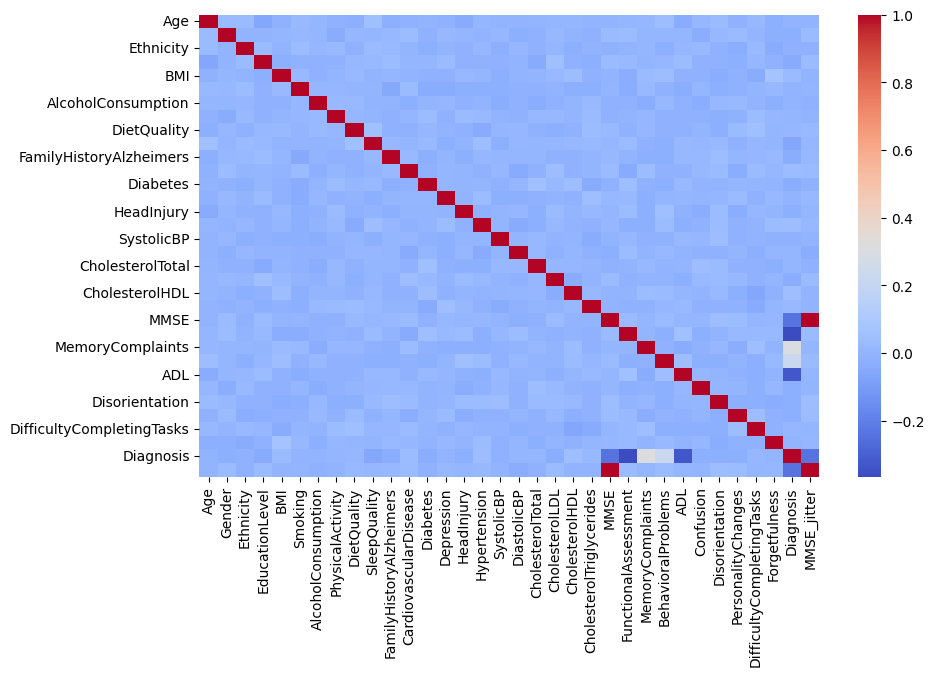

In [191]:
plt.figure(figsize=(10,6))
sns.heatmap(alzheimers_df.corr(), cmap='coolwarm')

## Models 